# Урок 7. Многомерный статистический анализ. Линейная регрессия

Задача 1

Дана матрица объект-признак

X = 
и значения целевой переменной
y = 
    Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
    Является ли значимым получившееся уравнение регрессии?



In [10]:
import numpy as np

x = np.array([[1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[0.75129018, 2.67392052, 3.65529809, 1.66746094],
[0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[2.29536229, 1.81206697, 1.95026215, 1.51874636],
[0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[2.39252799, 3.17563985, 3.61420599, 5.10773362],
[0.54983815, 2.87988651, 1.65752765, 1.59635987]])

y = np.array([9.26193358, 9.700363, 8.67214805, 8.74796974, 6.18689108, 7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218])

yi=a+bxi+εi   Узнать, насколько велика связь между переменными x и y, можно через коэффициент детерминации. буду искать коэффициент

In [31]:
x1=np.array(x[:, 0])    
x1

array([ 1.22401313, -0.18757272, -0.81094525,  0.75129018,  0.00972362,
       -0.62972637,  2.29536229,  0.0920418 ,  2.39252799,  0.54983815])

In [32]:
x2=np.array(x[:, 1])    
x2

array([2.30868478, 1.30337355, 1.82463398, 2.67392052, 1.97367255,
       0.77750764, 1.81206697, 2.26971361, 3.17563985, 2.87988651])

In [34]:
x3=np.array(x[:, 2])    
x3

array([3.03636353, 5.12093014, 5.79686488, 3.65529809, 2.50594319,
       2.84124027, 1.95026215, 7.47708735, 3.61420599, 1.65752765])

In [35]:
x4=np.array(x[:, 3])    
x4

array([2.69287214, 3.46363202, 1.86159445, 1.66746094, 1.69755173,
       4.54410559, 1.51874636, 2.61081203, 5.10773362, 1.59635987])

In [36]:
matrix1 = np.corrcoef(x1, y)
matrix1

array([[1.        , 0.35167669],
       [0.35167669, 1.        ]])

In [37]:
matrix2 = np.corrcoef(x2, y)
matrix2

array([[1.        , 0.39985835],
       [0.39985835, 1.        ]])

In [38]:
matrix3 = np.corrcoef(x3, y)
matrix3

array([[1.        , 0.58263745],
       [0.58263745, 1.        ]])

In [39]:
matrix4 = np.corrcoef(x4, y)
matrix4

array([[1.        , 0.60291678],
       [0.60291678, 1.        ]])

In [44]:
r1 = round(0.35167669**2, 2)
r2 = round(0.39985835**2, 2)
r3 = round(0.58263745**2, 2)
r4 = round(0.60291678**2, 2)
r1, r2, r3, r4

(0.12, 0.16, 0.34, 0.36)

Проверить значимость уравнения регрессии – значит установить, соответствует ли математическая модель, выражающая зависимость между переменными, экспериментальным данным и достаточно ли включенных в уравнение объясняющих переменных (одной или нескольких) для описания зависимой переменной. Проверка значимости уравнения регрессии производится на основе F-критерия Фишера

In [45]:
def fisher(r, n):
    F = r**2 * (n - 2) / (1 - r)
    return(f'{F} - фактический критерий Фишера')

In [46]:
print(fisher(r1, 10))

0.1309090909090909 - фактический критерий Фишера


In [47]:
print(fisher(r2, 10))

0.24380952380952384 - фактический критерий Фишера


In [48]:
print(fisher(r3, 10))

1.4012121212121216 - фактический критерий Фишера


In [49]:
print(fisher(r4, 10))

1.6199999999999999 - фактический критерий Фишера


 Табличное значение определяется по таблицам распределения Фишера для заданного уровня значимости, принимая во внимание, что число степеней свободы для общей суммы квадратов (большей дисперсии) равно 1 и число степеней свободы остаточной суммы квадратов (меньшей дисперсии) при линейной регрессии равно n-2
 
 у меня 1 и 8???, тогда Fкритическое = 5.32

Ответ: 3 и 4 столбец наиболее влияют на признак y, но уравнение незначимо

Задача 2

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака X значение salary, а в качестве целевой переменной Y - scoring.

    Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
    Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
    Посчитайте коэффициент детерминации.
    Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
    (доп) Посчитать среднюю ошибку аппроксимации



In [63]:
import numpy as np

salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.float64)
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype=np.float64)

In [59]:
b = (np.mean(salary * scoring) - np.mean(salary) * np.mean(scoring)) / (np.mean(salary**2) - np.mean(salary)**2)
b

2.620538882402765

In [60]:
a = np.mean(scoring) - b * np.mean(salary)
a

444.1773573243596

scoring = 444.2 + 2.6 * salary

In [61]:
r = b * np.std(salary) / np.std(scoring)
r

0.8874900920739162

In [62]:
R2 = r**2
R2

0.7876386635293682

78% показателя Y объясняется X

In [64]:
scoring_pred = a + b * salary
scoring_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [65]:
A_mean = 100 * np.mean(np.abs((scoring - scoring_pred) / scoring))
A_mean

11.46925184356171

Средняя ошибка аппроксимации 11.5 > 10%. Модель удовлетворительна

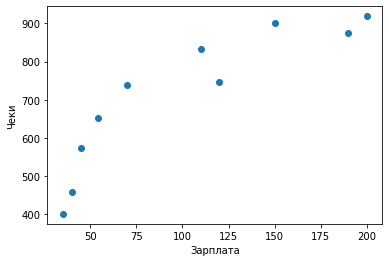

In [68]:
import matplotlib.pyplot as plt

plt.scatter(salary, scoring)
#plt.plot(salary, scoring)  #при добавлении этой строки появляются зигзаги
plt.xlabel('Зарплата')
plt.ylabel('Чеки')
plt.show()

In [69]:
print(fisher(R2, 10))

23.370531551429487 - фактический критерий Фишера


Ответ: табличное Fкритическое = 5.32, уравнение значимо